In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score, accuracy_score

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

from sklearn import metrics
from scipy import stats
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize


import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Understanding the Dataset

In [3]:
print(df.info())
print("======================")
print("Data shape is ", df.shape)
print("======================")
print("Missing Values")
print(df.isnull().sum())
print("======================")
print("there is ", df.duplicated().sum(), "duplicates")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
Data shape is  (730, 16)
Missing Values
instant       0
dteday        0
season        0


- there are no missing values, and duplicates

In [4]:
# Checking for unique values'
unique = []
for i in df.columns:
    x=df[i].value_counts().count()
    unique.append(x)
unique = pd.DataFrame(unique, index=df.columns, columns=['Unique Number'])
unique

,Unique Number
instant,730
dteday,730
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,498


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- there are 7 categorical and 6 numerical features inluding the target

## Data Cleanup

In [7]:
#renaming columns for better understanding

df = df.rename(columns={'yr': 'year', 'mnth': 'month', 'cnt': 'count'})
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Instant is an index, we drop that
#dteday is present in year,month, and day

df.drop(['instant', 'dteday'], axis=1, inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
print(df.season.value_counts())
print("======================")
print(df.year.value_counts())
print("======================")
print(df.month.value_counts())
print("======================")
print(df.holiday.value_counts())
print("======================")
print(df.weekday.value_counts())
print("======================")
print(df.weathersit.value_counts())
print("======================")

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
year
0    365
1    365
Name: count, dtype: int64
month
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
holiday
0    709
1     21
Name: count, dtype: int64
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
weathersit
1    463
2    246
3     21
Name: count, dtype: int64


- all six are categorical feature. we will replace them with their appropriate representation

In [10]:
df.head(0)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count


In [11]:
# Converting them to their appropriate valiues
df.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
df.year.replace((0,1), (2018, 2019),inplace=True)
df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'), inplace=True)
df.weekday.replace((0,1,2,3,4,5,6,), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), inplace=True)
df.weathersit.replace((1,2,3), ('clear', 'cloudy', 'snow'), inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,Spring,2018,Jan,0,Sun,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,2018,Jan,0,Mon,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,2018,Jan,0,Tue,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,2018,Jan,0,Wed,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,2018,Jan,0,Thu,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
print(df.casual[0] + df.registered[0])
print(df.casual[1] + df.registered[1])
print(df.casual[2] + df.registered[2])
print(df.casual[3] + df.registered[3])
print(df.casual[4] + df.registered[4])

985
801
1349
1562
1600


casual and registered seems to be the sum of count. great if we drop the columns

In [13]:
df.drop(['casual', 'registered'], axis=1, inplace=True)
df.head(1)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,Spring,2018,Jan,0,Sun,0,cloudy,14.110847,18.18125,80.5833,10.749882,985


In [14]:
# let's separate our category and numeric features

category = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
numeric = ['temp', 'atemp', 'hum', 'windspeed', 'count']
cat_axis = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
numaxis = ['temp', 'atemp', 'hum', 'windspeed', 'count']

## Univariate Analysis of our numerical featuress

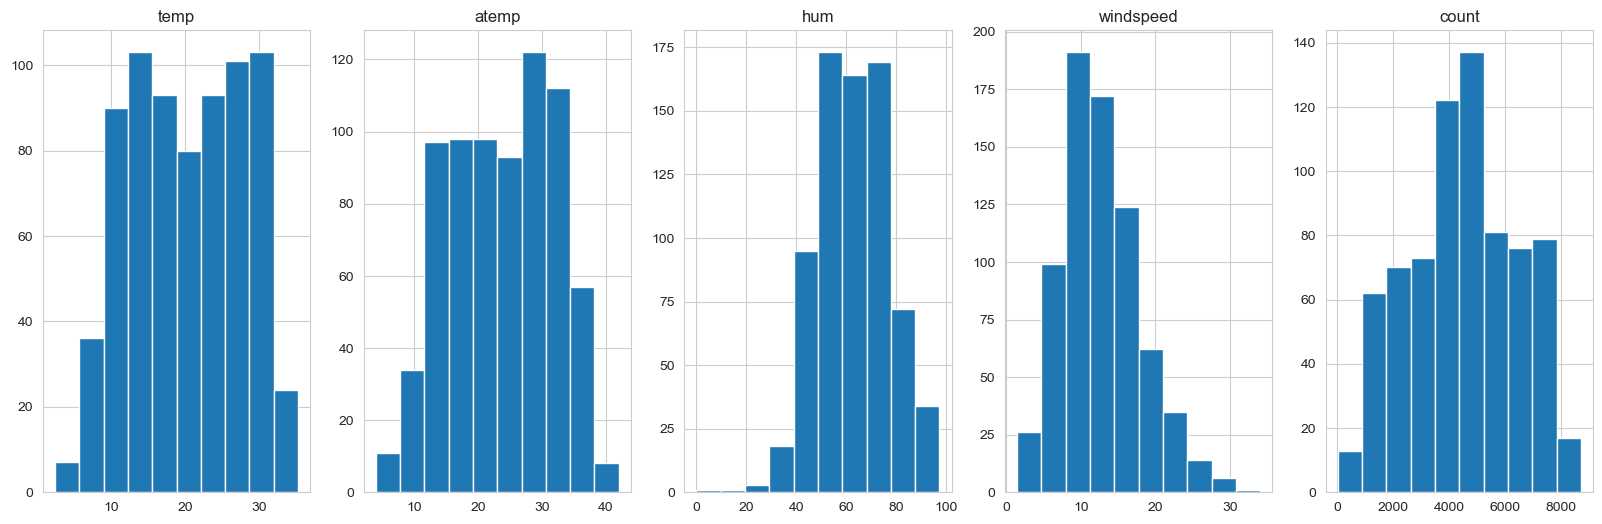

In [15]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20,6))

ax1.hist(df['temp'])
ax1.set_title('temp')

ax2.hist(df['atemp'])
ax2.set_title('atemp')

ax3.hist(df['hum'])
ax3.set_title('hum')

ax4.hist(df['windspeed'])
ax4.set_title('windspeed')

ax5.hist(df['count'])
ax5.set_title('count');


hum and windspeed may have outliers since they are not reallu distributed. let's check

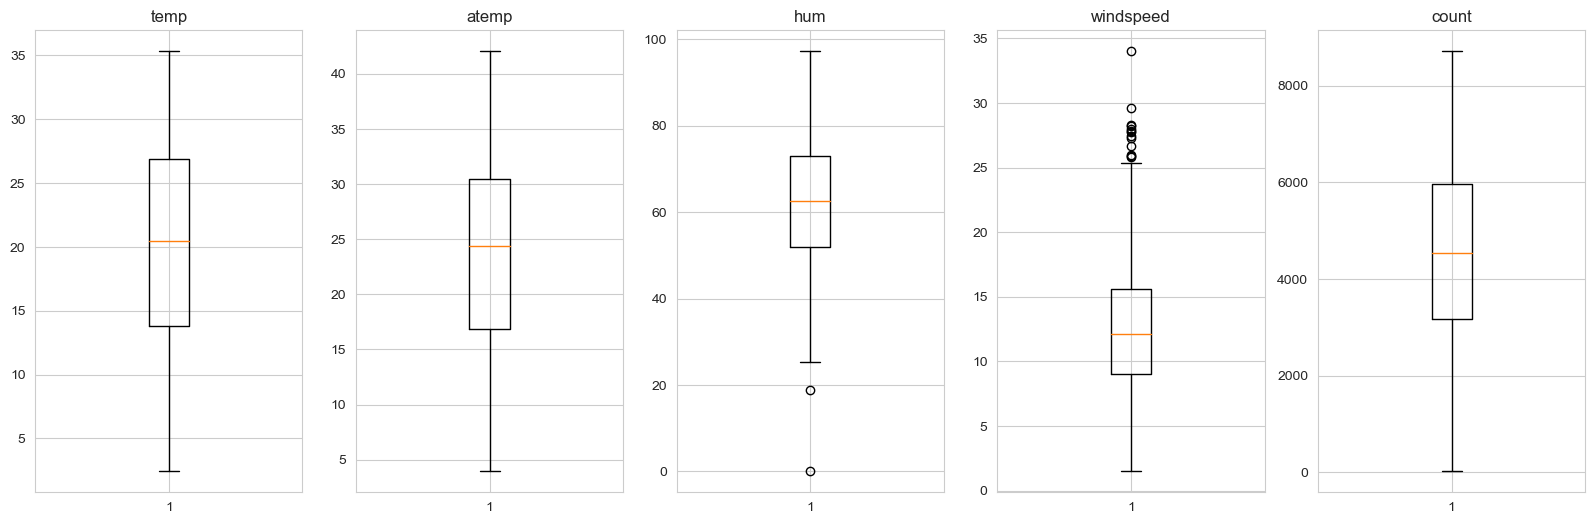

In [16]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20,6))

ax1.boxplot(df['temp'])
ax1.set_title('temp')

ax2.boxplot(df['atemp'])
ax2.set_title('atemp')

ax3.boxplot(df['hum'])
ax3.set_title('hum')

ax4.boxplot(df['windspeed'])
ax4.set_title('windspeed')

ax5.boxplot(df['count'])
ax5.set_title('count');

hum and windspeed have outliers, will be taken care of

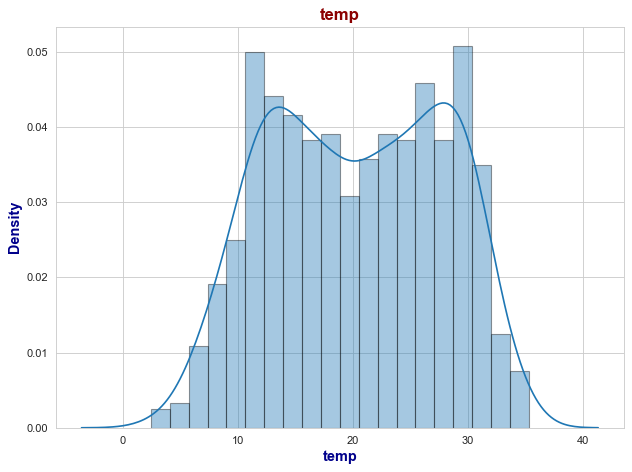

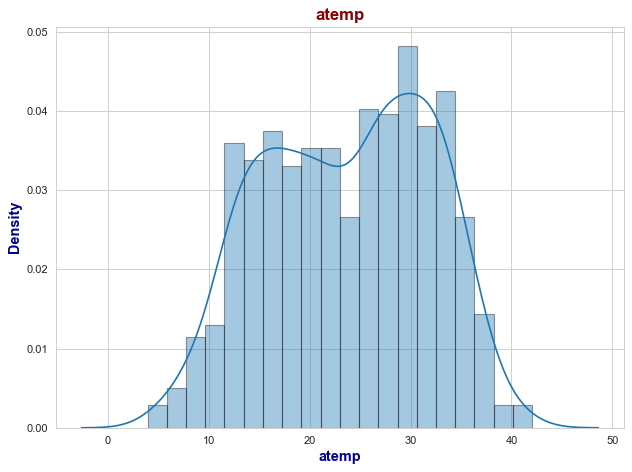

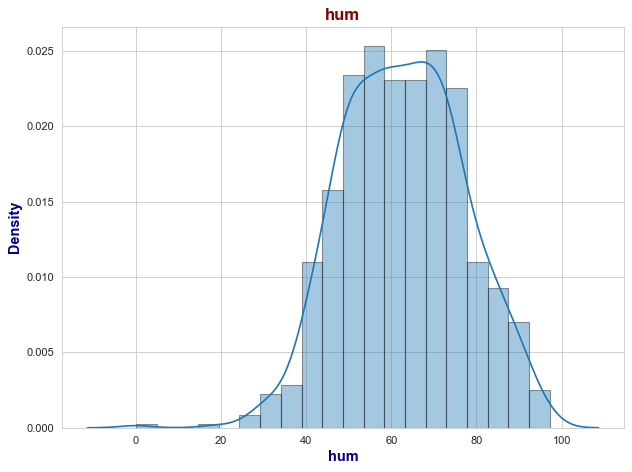

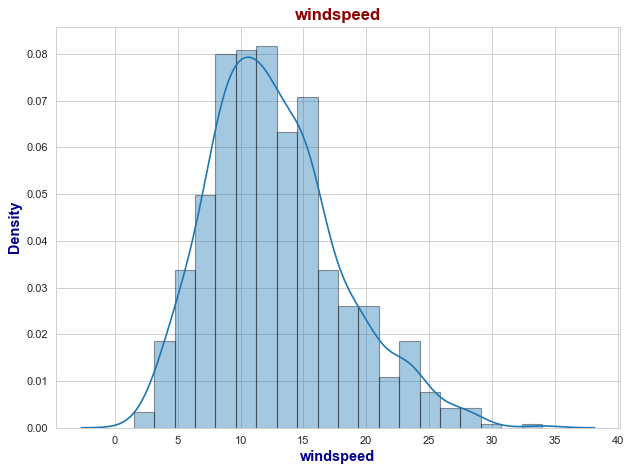

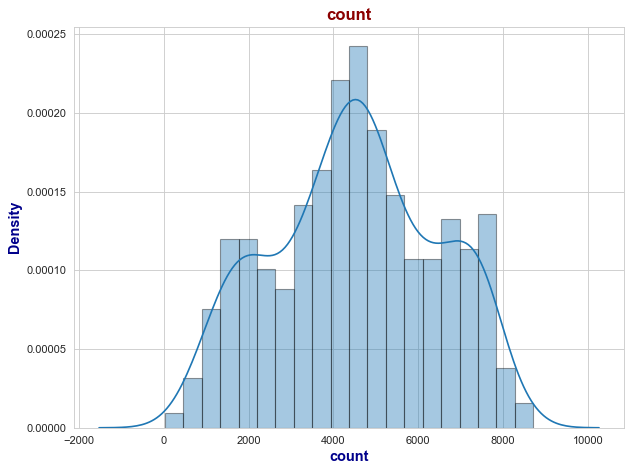

In [17]:
title_font={'family': 'arial', 'color': 'darkred', 'weight': 'bold', 'size': 15}
axis_font={'family': 'arial', 'color': 'darkblue', 'weight': 'bold', 'size': 13}

for i,z in list(zip(numeric, numaxis)):
    plt.figure(figsize=(8,6),dpi=80)
    sns.distplot(df[i],hist_kws=dict(linewidth=1,edgecolor='k'),bins=20)
    plt.title(i,fontdict=title_font)
    plt.xlabel(z,fontdict=axis_font)
    plt.ylabel('Density',fontdict=axis_font)
    plt.tight_layout()
    plt.show()

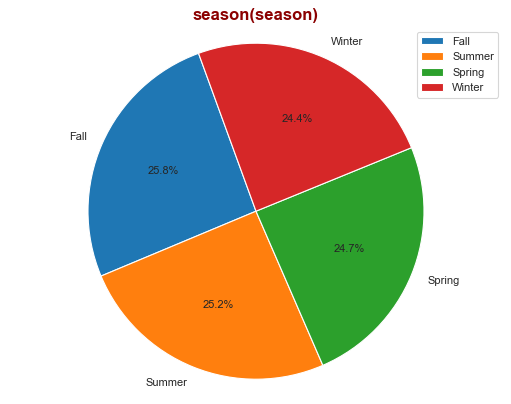

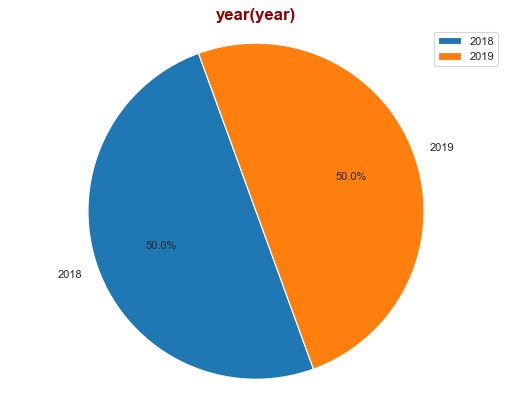

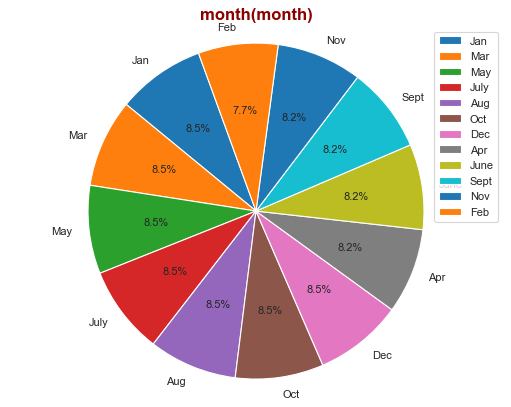

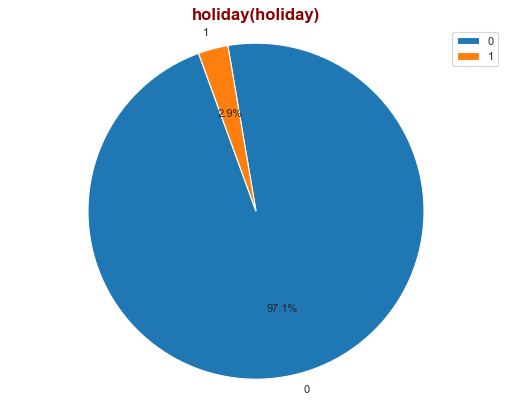

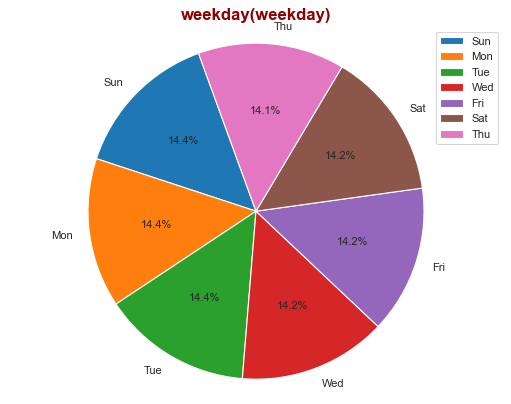

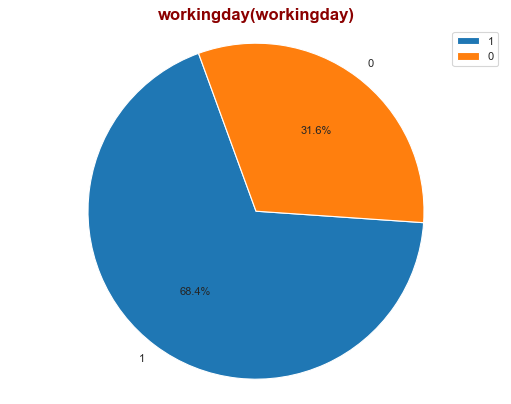

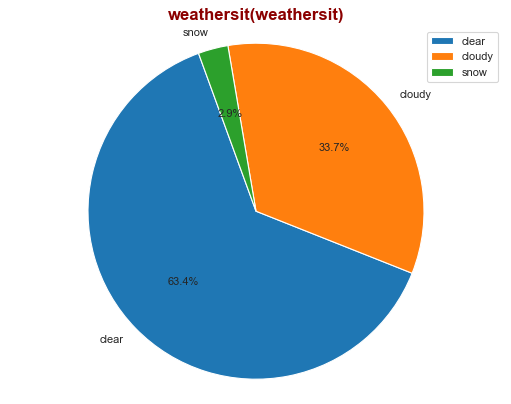

In [18]:
title_font={'family': 'arial', 'color': 'darkred', 'weight': 'bold', 'size': 15}
axis_font={'family': 'arial', 'color': 'darkblue', 'weight': 'bold', 'size': 13}

for i, z in list(zip(category,cat_axis)):
    fig,ax = plt.subplots(figsize=(8,6),dpi=80)
    
    observation_values=list(df[i].value_counts().index)
    total_observation = list(df[i].value_counts())
    
    ax.pie(total_observation,labels=observation_values, autopct='%1.1f%%',startangle=110, labeldistance=1.1)
    ax.axis('equal')
    
    plt.title((i +'('+ z+ ')'), fontdict=title_font)
    plt.legend()
    plt.show()

## Bivariate Analysis


In [19]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,Spring,2018,Jan,0,Sun,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Mon,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Tue,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Wed,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Thu,1,clear,9.305237,11.46350,43.6957,12.522300,1600


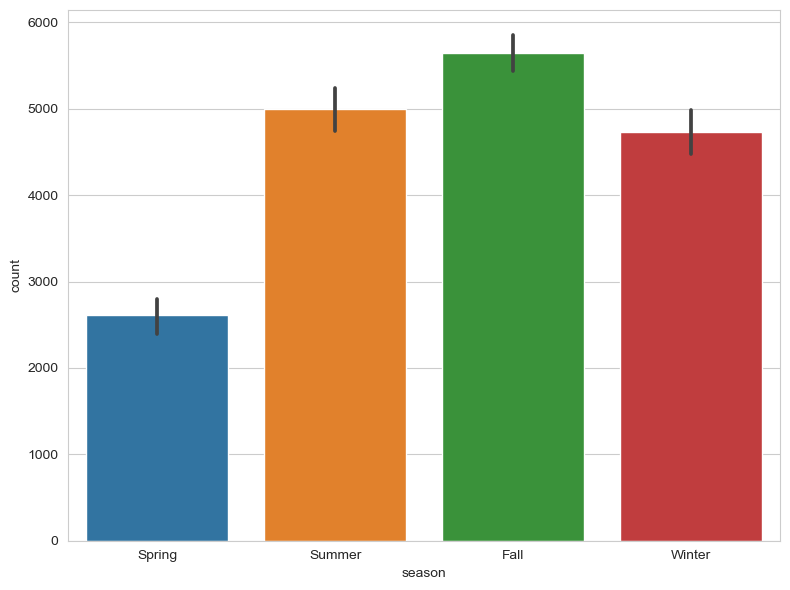

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, y='count', x='season')
plt.tight_layout()
plt.show()

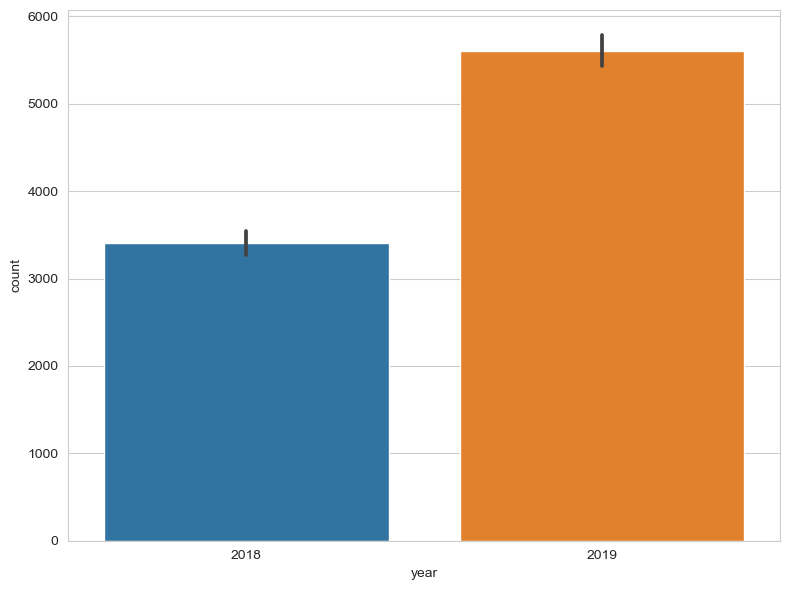

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, y='count', x='year')
plt.tight_layout()
plt.show()

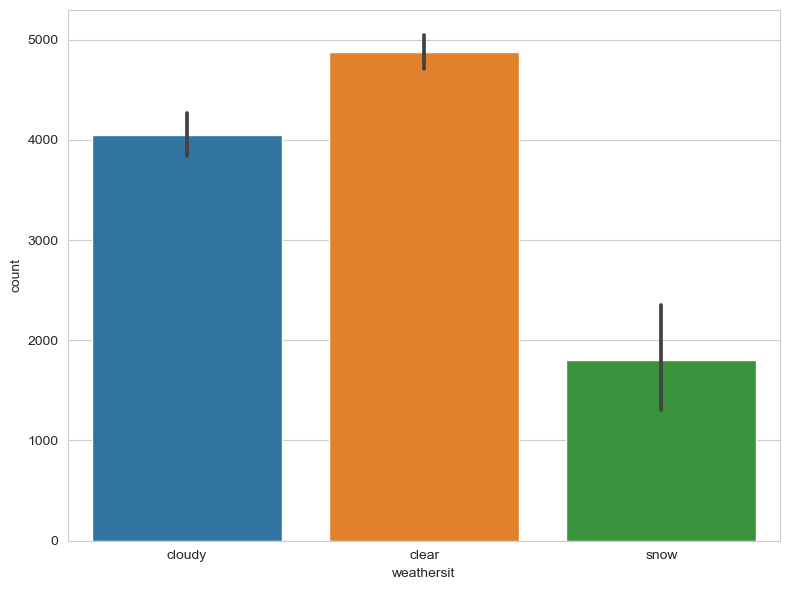

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, y='count', x='weathersit')
plt.tight_layout()
plt.show()

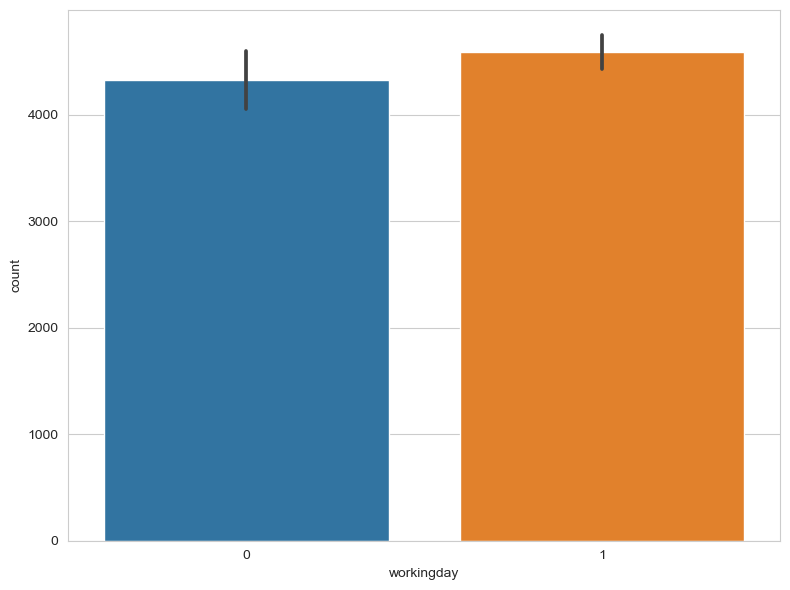

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, y='count', x='workingday')
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

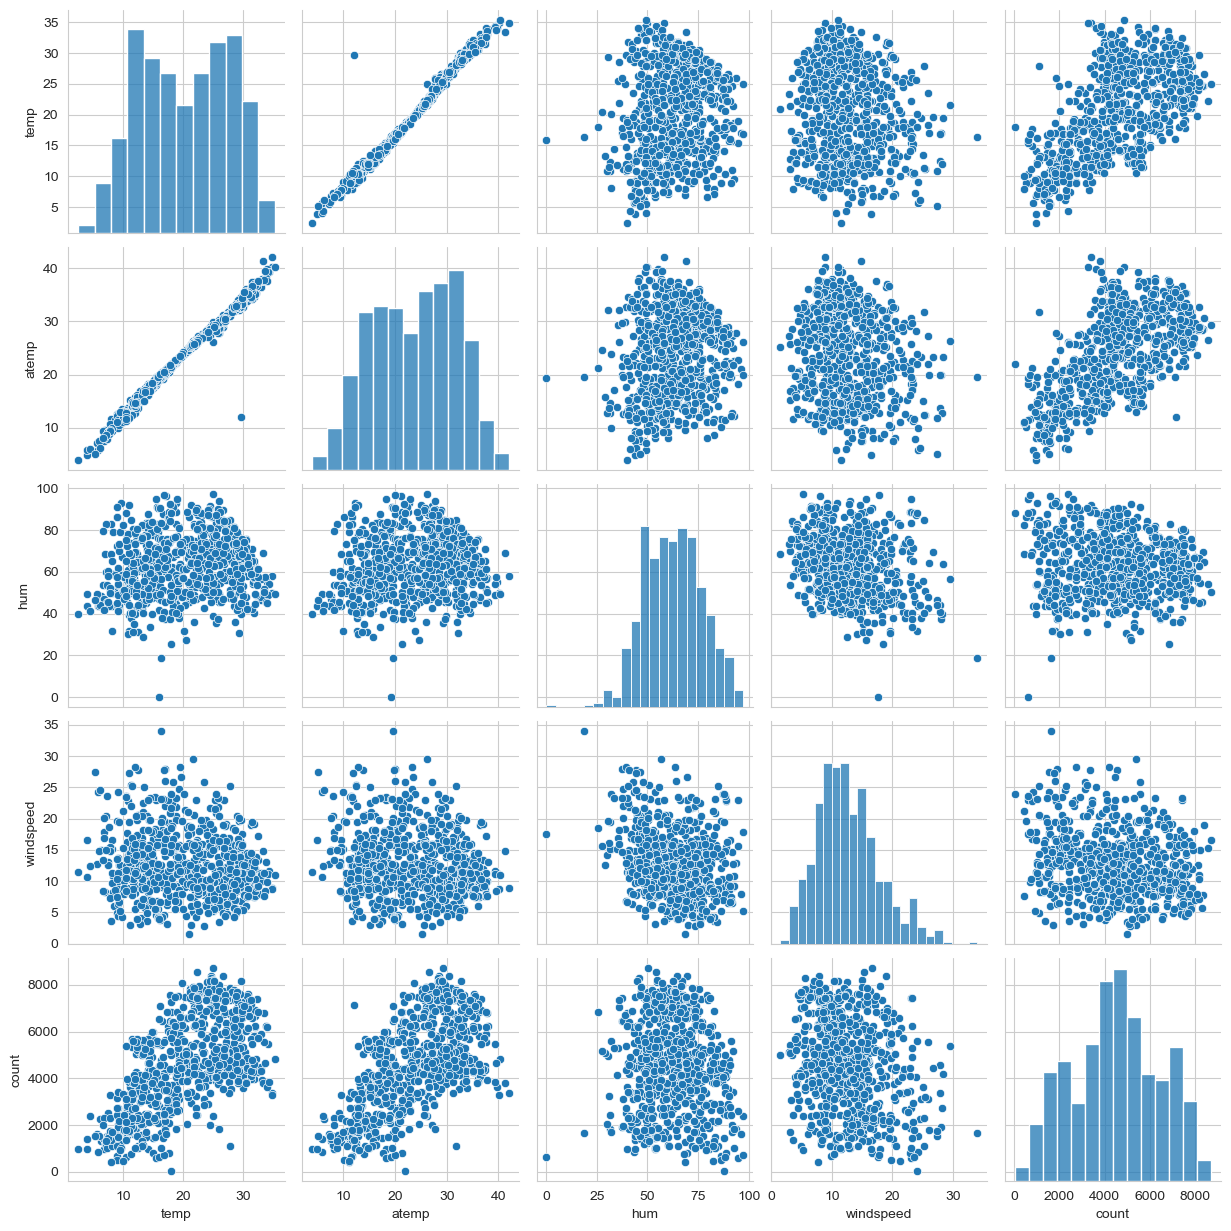

In [24]:
# Pair plot
plt.figure(figsize=(20,8))
sns.pairplot(data=df, x_vars=numeric, y_vars=numeric)

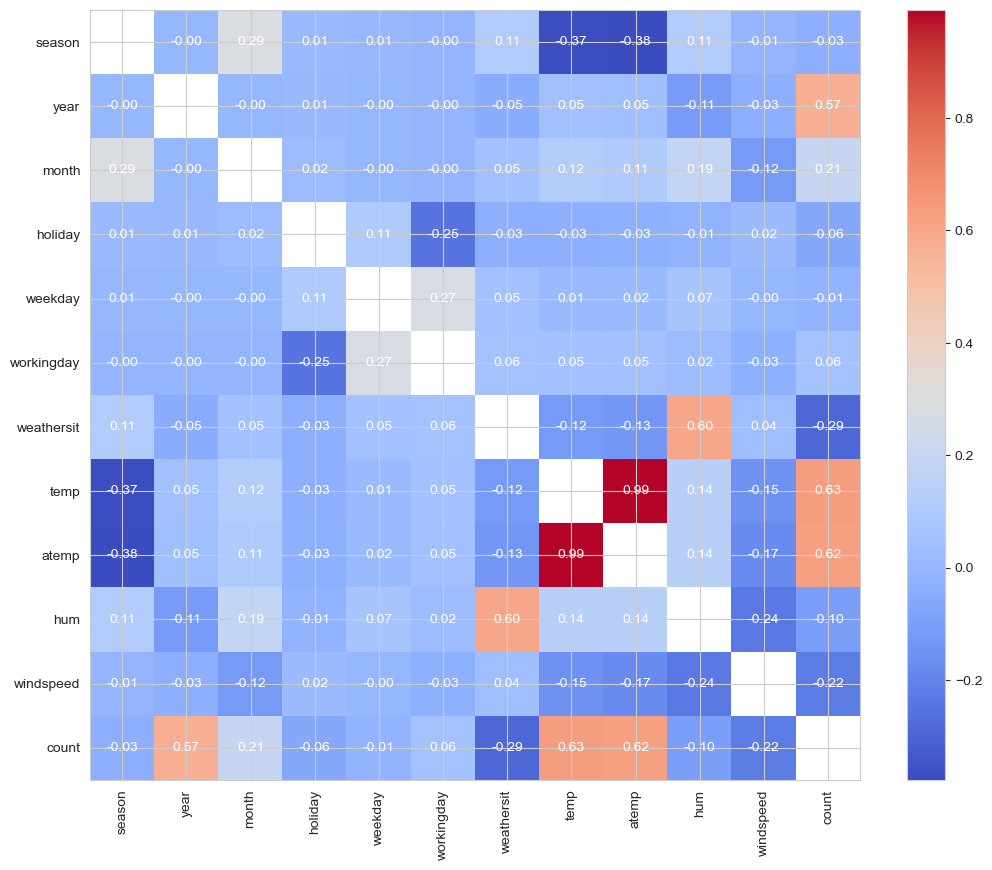

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame with categorical data
categories = df.columns
data = df.apply(lambda x: pd.Categorical(x).codes)

corr_matrix = data.corr()

# Set diagonal elements to NaN
np.fill_diagonal(corr_matrix.values, np.nan)

plt.figure(figsize=(15, 10))
heatmap = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')

plt.colorbar(heatmap, fraction=0.046, pad=0.04)  # Add colorbar

plt.xticks(np.arange(len(categories)), categories, rotation=90)
plt.yticks(np.arange(len(categories)), categories)

# Add annotations
for i in range(len(categories)):
    for j in range(len(categories)):
        if not np.isnan(corr_matrix.iloc[i, j]):
            plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


- there are more purchase of bike rental during the fall
- year 2019 with the highest count of bike rental
- during clear weather, there are more rental count
- there is correlation between temp and atemp, with temp having a good correlation with count

## Preprocessing

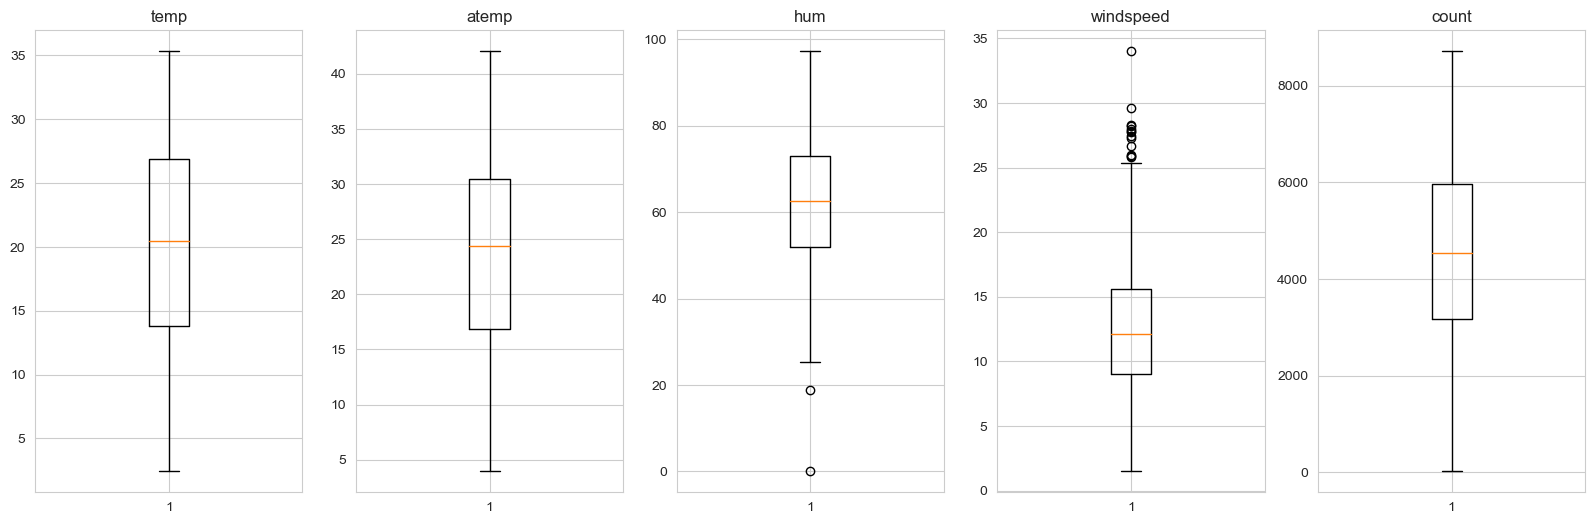

In [26]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20,6))

ax1.boxplot(df['temp'])
ax1.set_title('temp')

ax2.boxplot(df['atemp'])
ax2.set_title('atemp')

ax3.boxplot(df['hum'])
ax3.set_title('hum')

ax4.boxplot(df['windspeed'])
ax4.set_title('windspeed')

ax5.boxplot(df['count'])
ax5.set_title('count');

In [27]:
def iqr(df,var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3-q1
    lower_v=q1-(1.5*diff)
    upper_v=q3+(1.5*diff)
    return df[(df[var]<lower_v) | (df[var]>upper_v)]

In [28]:
hum_out = iqr(df, 'hum')
hum_out

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
49,Spring,2018,Feb,0,Sun,0,clear,16.365847,19.5702,18.7917,34.000021,1635
68,Spring,2018,Mar,0,Fri,1,snow,15.952731,19.2834,0.0000,17.545759,623


In [29]:
hum_out.hum.min()

0.0

In [30]:
# since the rows are just 2, i will drop them
df.drop([49, 68],axis=0,inplace=True)

In [31]:
df.hum[44:70]

44    37.5833
45    31.4348
46    42.3478
47    50.5000
48    51.6667
50    40.7826
51    60.5000
52    57.7778
53    42.3043
54    69.7391
55    71.2174
56    53.7917
57    68.0000
58    87.6364
59    53.5000
60    44.9583
61    31.8333
62    61.0417
63    78.9167
64    94.8261
65    55.1304
66    42.0833
67    77.5417
69    64.9565
70    59.4583
71    52.7391
Name: hum, dtype: float64

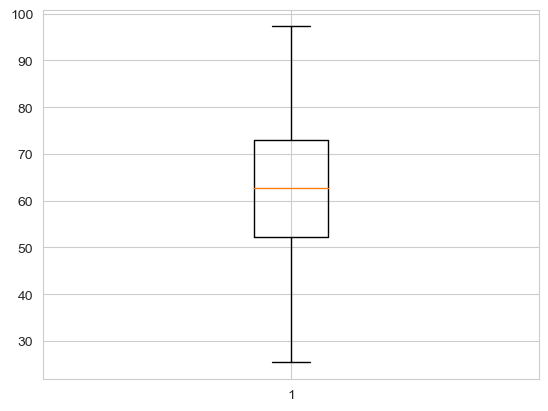

In [32]:
plt.boxplot(df['hum']);

In [33]:
windspeed_out = iqr(df, 'windspeed')
windspeed_out

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
44,Spring,2018,Feb,0,Tue,1,clear,17.015000,19.91750,37.5833,27.999836,1913
93,Summer,2018,Apr,0,Tue,1,clear,23.506653,27.14645,42.6250,25.833257,3115
94,Summer,2018,Apr,0,Wed,1,cloudy,16.980847,19.91750,64.2083,26.000489,1795
292,Winter,2018,Oct,0,Fri,1,clear,19.509153,23.32625,63.6250,28.292425,4195
382,Spring,2019,Jan,0,Thu,1,clear,12.436653,13.76270,44.3333,27.833743,3376
407,Spring,2019,Feb,0,Mon,0,clear,5.227500,5.08290,46.4583,27.417204,1529
420,Spring,2019,Feb,0,Sun,0,clear,11.924153,12.78375,39.5833,28.250014,2732
431,Spring,2019,Mar,0,Fri,1,clear,21.627500,26.23020,56.7500,29.584721,5382
432,Spring,2019,Mar,0,Sat,1,cloudy,16.844153,19.85415,40.7083,27.791600,4569
449,Summer,2019,Mar,0,Tue,1,clear,18.279153,21.93750,47.7917,25.917007,5558


In [34]:
windspeed_out.windspeed.min()

25.833257

In [35]:
df[df['windspeed']<25.833257].windspeed.max()

25.333236

In [36]:
df[df['windspeed']<25.333236].windspeed.max()

25.250357

In [37]:
winsorize_percentile_windspeed=stats.percentileofscore(df['windspeed'], 25.250357)/100
print(winsorize_percentile_windspeed)

0.9821428571428572


In [38]:
1-winsorize_percentile_windspeed

0.017857142857142794

In [39]:
windspeed_winsorize=winsorize(df.windspeed,(0, (1-winsorize_percentile_windspeed)))
windspeed_winsorize

masked_array(data=[10.749882 , 16.652113 , 16.636703 , 10.739832 ,
                   12.5223   ,  6.0008684, 11.304642 , 17.875868 ,
                   24.25065  , 14.958889 ,  8.182844 , 20.410009 ,
                   20.167    ,  8.478716 , 10.583521 , 12.625011 ,
                   12.999139 ,  9.833925 , 13.957239 , 13.125568 ,
                   23.667214 , 11.52199  , 16.5222   , 10.60811  ,
                    8.696332 , 19.68795  ,  7.627079 ,  8.2611   ,
                    9.739455 ,  4.9568342, 12.541864 ,  3.565271 ,
                   17.708636 , 18.609384 ,  8.565213 , 10.792293 ,
                    9.5006   ,  3.0423561, 24.25065  , 12.652213 ,
                   14.869645 ,  7.27285  , 13.625589 , 17.479161 ,
                   25.333236 , 19.522058 , 16.869997 , 15.416968 ,
                   17.749975 , 14.956745 , 20.625682 , 13.110761 ,
                    6.305571 , 16.783232 , 23.218113 , 12.500257 ,
                    8.391616 , 19.408962 , 14.500475 , 20.6248

Text(0.5, 0, 'windspeed_winsorize')

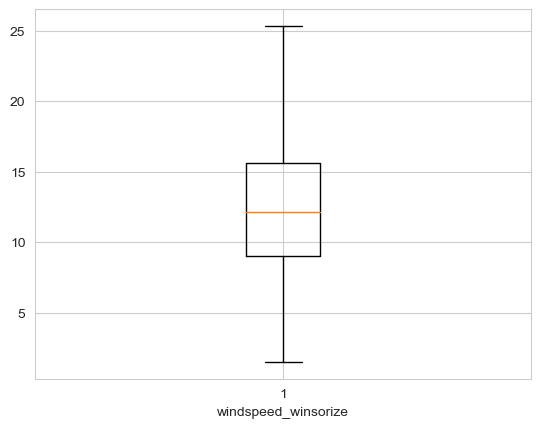

In [40]:
plt.boxplot(windspeed_winsorize)
plt.xlabel('windspeed_winsorize')

In [41]:
df['windspeed_win'] = windspeed_winsorize

In [42]:
df.drop('windspeed',axis=1,inplace=True)

In [43]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,count,windspeed_win
0,Spring,2018,Jan,0,Sun,0,cloudy,14.110847,18.18125,80.5833,985,10.749882
1,Spring,2018,Jan,0,Mon,0,cloudy,14.902598,17.68695,69.6087,801,16.652113
2,Spring,2018,Jan,0,Tue,1,clear,8.050924,9.47025,43.7273,1349,16.636703
3,Spring,2018,Jan,0,Wed,1,clear,8.200000,10.60610,59.0435,1562,10.739832
4,Spring,2018,Jan,0,Thu,1,clear,9.305237,11.46350,43.6957,1600,12.522300


In [44]:
print("shape of data is", df.shape, "after removing two outliers in the row")

shape of data is (728, 12) after removing two outliers in the row


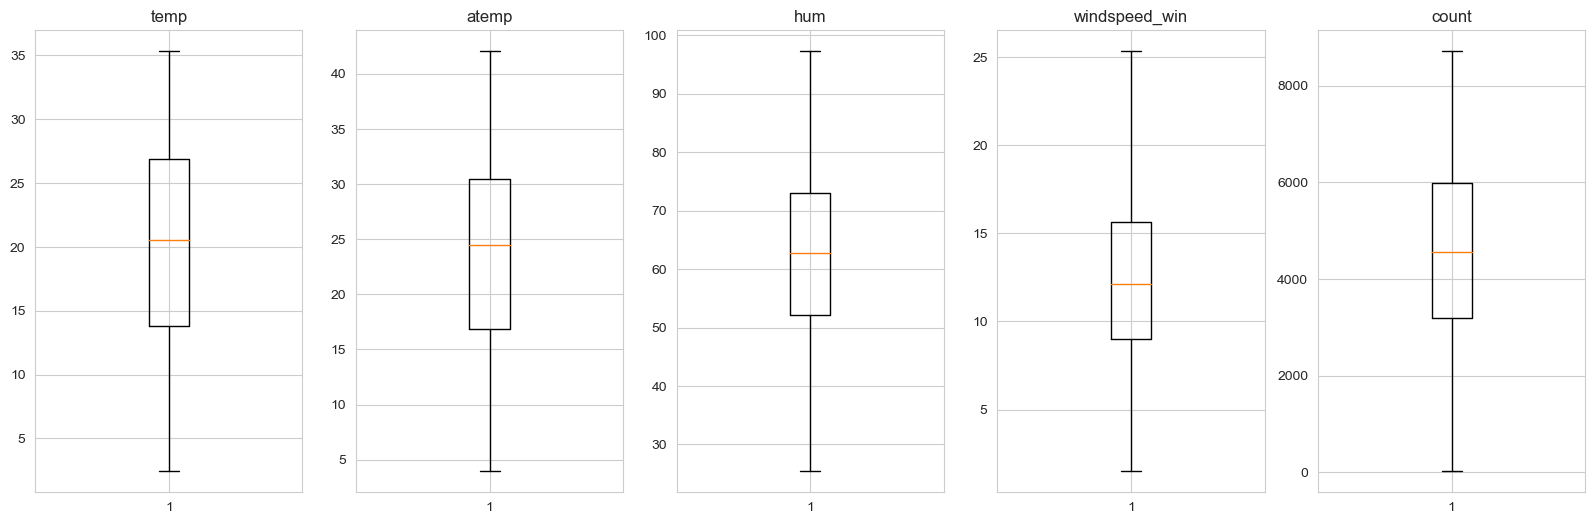

In [45]:
#let view the data again
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20,6))

ax1.boxplot(df['temp'])
ax1.set_title('temp')

ax2.boxplot(df['atemp'])
ax2.set_title('atemp')

ax3.boxplot(df['hum'])
ax3.set_title('hum')

ax4.boxplot(df['windspeed_win'])
ax4.set_title('windspeed_win')

ax5.boxplot(df['count'])
ax5.set_title('count');

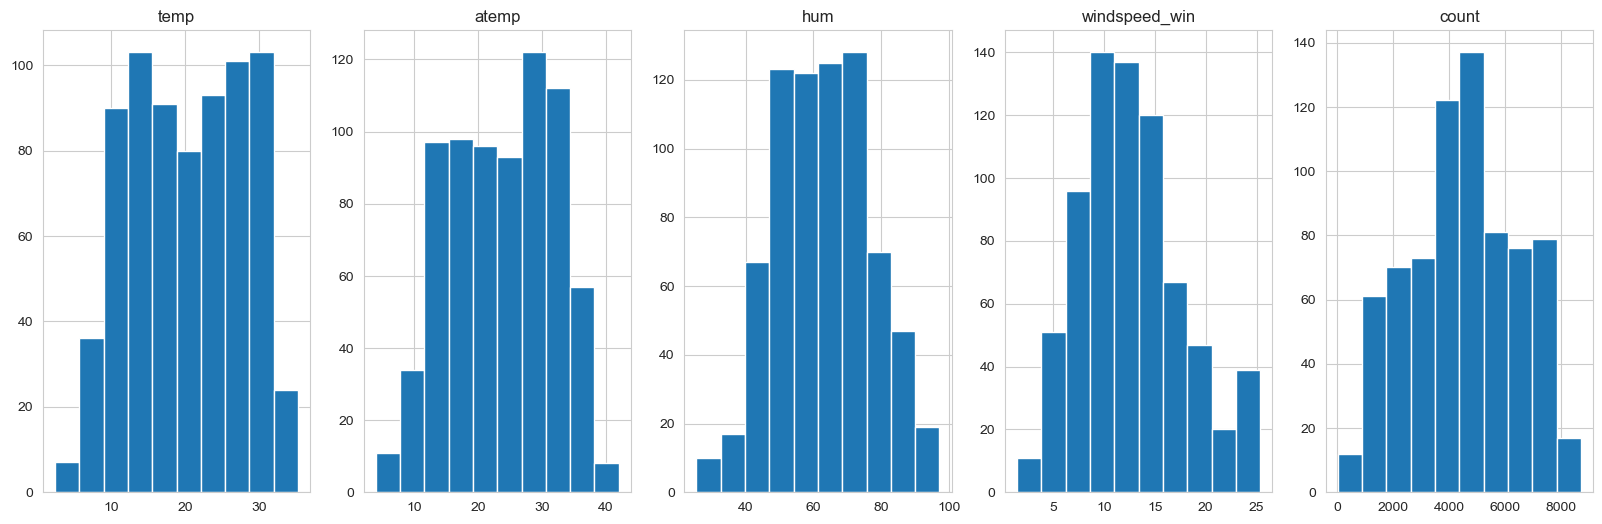

In [46]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20,6))

ax1.hist(df['temp'])
ax1.set_title('temp')

ax2.hist(df['atemp'])
ax2.set_title('atemp')

ax3.hist(df['hum'])
ax3.set_title('hum')

ax4.hist(df['windspeed_win'])
ax4.set_title('windspeed_win')

ax5.hist(df['count'])
ax5.set_title('count');


In [47]:
df[['temp', 'hum', 'count', 'windspeed_win']].agg(['skew']).transpose()

,skew
temp,-0.061286
hum,0.064906
count,-0.048831
windspeed_win,0.522734


In [48]:
numeric.remove('windspeed')

In [49]:
numeric.append('windspeed_win')
numeric

['temp', 'atemp', 'hum', 'count', 'windspeed_win']

<Figure size 2000x800 with 0 Axes>

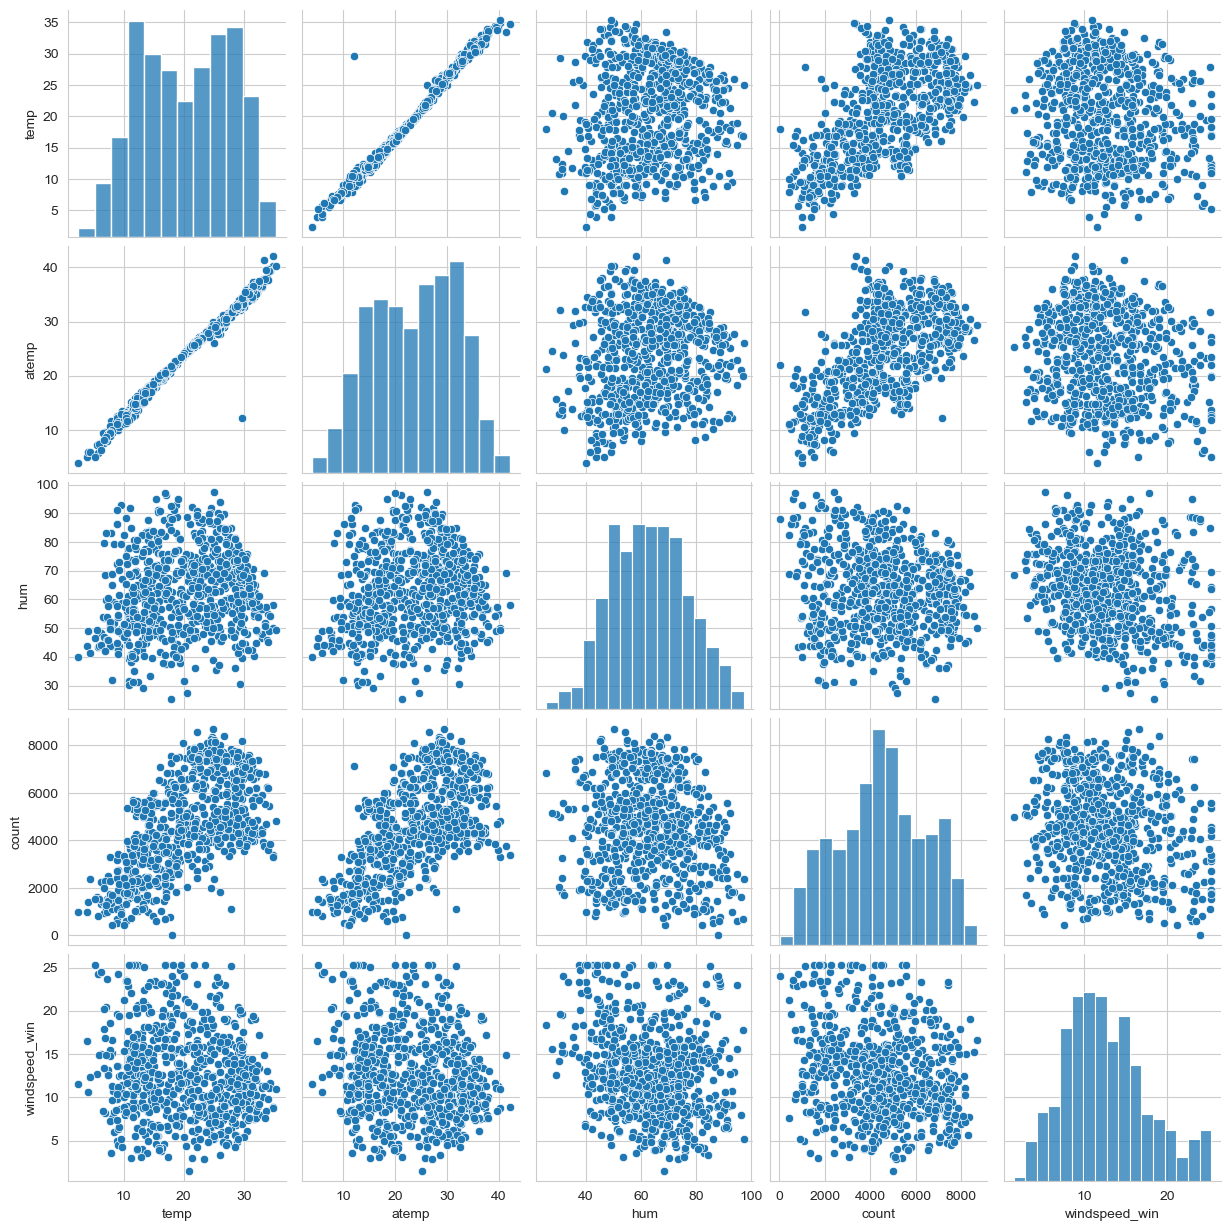

In [50]:
# Pair plot again
plt.figure(figsize=(20,8))
sns.pairplot(data=df, x_vars=numeric, y_vars=numeric)

In [51]:
df.drop('atemp', axis=1, inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,hum,count,windspeed_win
0,Spring,2018,Jan,0,Sun,0,cloudy,14.110847,80.5833,985,10.749882
1,Spring,2018,Jan,0,Mon,0,cloudy,14.902598,69.6087,801,16.652113
2,Spring,2018,Jan,0,Tue,1,clear,8.050924,43.7273,1349,16.636703
3,Spring,2018,Jan,0,Wed,1,clear,8.200000,59.0435,1562,10.739832
4,Spring,2018,Jan,0,Thu,1,clear,9.305237,43.6957,1600,12.522300


In [52]:
unique

,Unique Number
instant,730
dteday,730
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,498


In [53]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,hum,count,windspeed_win
0,Spring,2018,Jan,0,Sun,0,cloudy,14.110847,80.5833,985,10.749882
1,Spring,2018,Jan,0,Mon,0,cloudy,14.902598,69.6087,801,16.652113
2,Spring,2018,Jan,0,Tue,1,clear,8.050924,43.7273,1349,16.636703
3,Spring,2018,Jan,0,Wed,1,clear,8.200000,59.0435,1562,10.739832
4,Spring,2018,Jan,0,Thu,1,clear,9.305237,43.6957,1600,12.522300


In [54]:
# Changing the year values to 0 and 1
df.year.replace((2018,2019), (0,1),inplace=True)


In [55]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,hum,count,windspeed_win
0,Spring,0,Jan,0,Sun,0,cloudy,14.110847,80.5833,985,10.749882
1,Spring,0,Jan,0,Mon,0,cloudy,14.902598,69.6087,801,16.652113
2,Spring,0,Jan,0,Tue,1,clear,8.050924,43.7273,1349,16.636703
3,Spring,0,Jan,0,Wed,1,clear,8.200000,59.0435,1562,10.739832
4,Spring,0,Jan,0,Thu,1,clear,9.305237,43.6957,1600,12.522300


In [56]:
df_copy=df.copy()

In [57]:
category

['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

In [58]:
new_cat = ['season', 'month', 'weekday', 'weathersit']

In [59]:
#creating dummy variable for categorical variables
season=pd.get_dummies(df['season'], columns=new_cat, drop_first=True).astype('int')
month = pd.get_dummies(df['month'], columns=new_cat, drop_first = True).astype('int')
weekday = pd.get_dummies(df['weekday'], columns=new_cat, drop_first = True).astype('int')
weathersit = pd.get_dummies(df['weathersit'], columns=new_cat, drop_first = True).astype('int')

In [60]:
#adding dummy variables
df_copy = pd.concat([df_copy, season, month, weekday, weathersit], axis = 1)

In [61]:
df_copy.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,hum,count,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,snow
0,Spring,0,Jan,0,Sun,0,cloudy,14.110847,80.5833,985,...,0,0,0,0,1,0,0,0,1,0
1,Spring,0,Jan,0,Mon,0,cloudy,14.902598,69.6087,801,...,0,0,1,0,0,0,0,0,1,0
2,Spring,0,Jan,0,Tue,1,clear,8.050924,43.7273,1349,...,0,0,0,0,0,0,1,0,0,0
3,Spring,0,Jan,0,Wed,1,clear,8.200000,59.0435,1562,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,Thu,1,clear,9.305237,43.6957,1600,...,0,0,0,0,0,1,0,0,0,0


In [62]:
df_copy.drop(['season', 'month', 'weekday', 'weathersit'], inplace=True, axis=1)

In [63]:
df_copy.head()

,year,holiday,workingday,temp,hum,count,windspeed_win,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,snow
0,0,0,0,14.110847,80.5833,985,10.749882,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,69.6087,801,16.652113,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,1349,16.636703,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,1562,10.739832,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,1600,12.522300,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
numeric.remove('atemp')
numeric

['temp', 'hum', 'count', 'windspeed_win']

In [65]:
scaler = MinMaxScaler()
df_copy[numeric] = scaler.fit_transform(df[numeric])
df_copy.head()

,year,holiday,workingday,temp,hum,count,windspeed_win,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,snow
0,0,0,0,0.355170,0.767981,0.110792,0.388102,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0.379232,0.615202,0.089623,0.635752,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0.171000,0.254904,0.152669,0.635105,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0.175530,0.468123,0.177174,0.387681,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0.209120,0.254464,0.181546,0.462471,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [66]:
df_copy.describe()

,year,holiday,workingday,temp,hum,count,windspeed_win,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,snow
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,...,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,0.501374,0.028846,0.684066,0.544200,0.521974,0.517176,0.469662,0.244505,0.252747,0.244505,...,0.085165,0.082418,0.144231,0.142857,0.142857,0.141484,0.144231,0.142857,0.337912,0.027473
std,0.500342,0.167489,0.465206,0.228357,0.194481,0.222084,0.211729,0.430089,0.434886,0.430089,...,0.279319,0.275189,0.351565,0.350168,0.350168,0.348759,0.351565,0.350168,0.473324,0.163568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.345564,0.372244,0.364818,0.316000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.550903,0.519142,0.521054,0.445803,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743521,0.662558,0.685285,0.592644,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


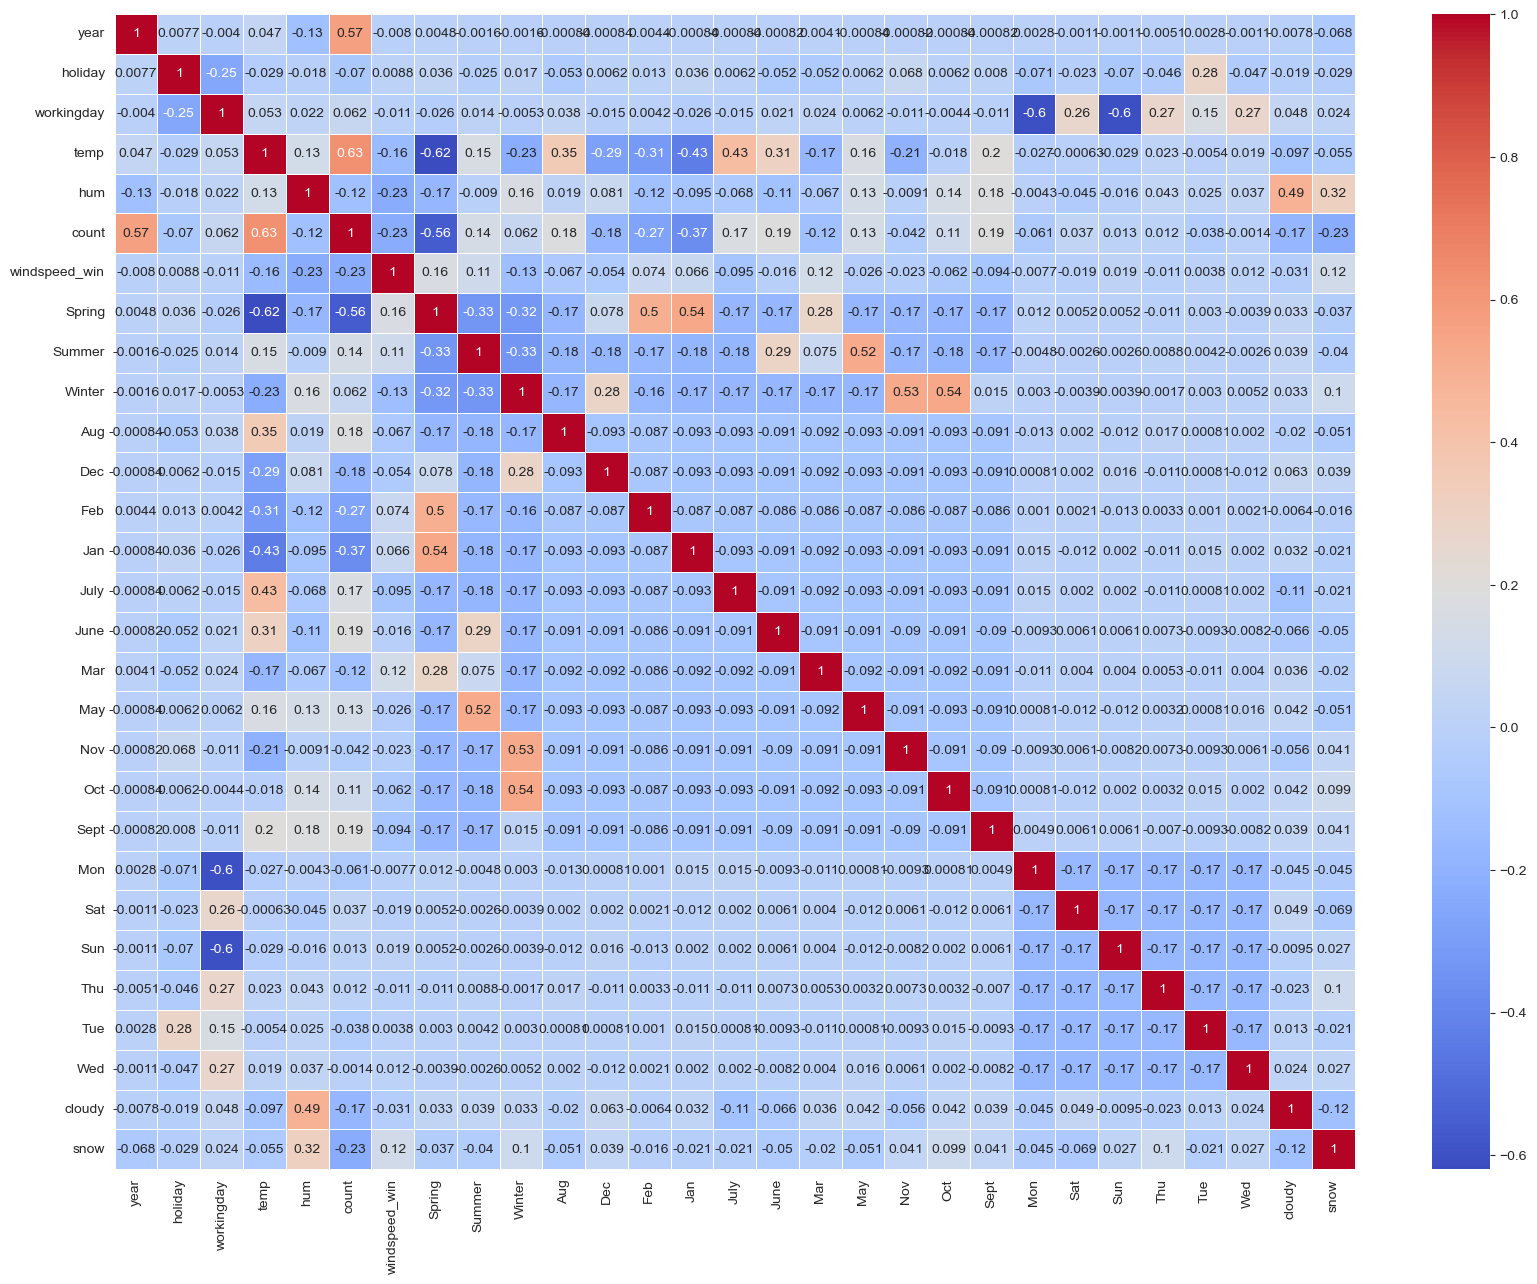

In [67]:
#let's check the correlation
plt.figure(figsize=(20,15))
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm',linewidths=0.5);

## Modeling

In [68]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame containing the independent variables

# Drop the target variable from the DataFrame
X = df_copy.drop('count', axis=1)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the results
print(vif_data)



         Variable        VIF
0            year   1.053922
1         holiday   4.633419
2      workingday  80.495999
3            temp   7.111444
4             hum   2.291797
5   windspeed_win   1.221298
6          Spring  10.365665
7          Summer   7.958501
8          Winter   8.340819
9             Aug   5.574263
10            Dec   5.632287
11            Feb   5.015566
12            Jan   5.891715
13           July   5.883438
14           June   2.802118
15            Mar   3.221619
16            May   2.141514
17            Nov   6.396043
18            Oct   6.261477
19           Sept   4.778483
20            Mon  16.748884
21            Sat   1.731753
22            Sun  16.457783
23            Thu   1.733698
24            Tue   1.816424
25            Wed   1.730860
26         cloudy   1.701950
27           snow   1.435003


df_copy.drop(['hum', 'holiday', 'windspeed_win', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'cloudy', 'Nov', 'Mar'], axis=1, inplace=True)

In [69]:
df_copy.head()

,year,holiday,workingday,temp,hum,count,windspeed_win,Spring,Summer,Winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,cloudy,snow
0,0,0,0,0.355170,0.767981,0.110792,0.388102,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0.379232,0.615202,0.089623,0.635752,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0.171000,0.254904,0.152669,0.635105,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0.175530,0.468123,0.177174,0.387681,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0.209120,0.254464,0.181546,0.462471,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
df_copy.shape

(728, 29)

In [71]:
#Split the data into X and y

X = df_copy.drop(['count'], axis=1)
y = df_copy['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_test.shape, X_train.shape

((146, 28), (582, 28))

## Linear Regression

In [73]:
#make a seed
np.random.seed(42)

#Instantiating Linear Regressor
lr_model = LinearRegression()
print("Model name = ", lr_model)
#fit model to data
lr_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", lr_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = lr_model.predict(X_test)

#Intercept of the model
print("Model Intercept =", lr_model.intercept_)

#Coefficient of the model
print("Model Coeff =", lr_model.coef_)

#Evaluation metrics
MAE_1 = mean_absolute_error(y_test, y_pred)
MSE_1 = mean_squared_error(y_test, y_pred)
RMSE_1 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_1 = r2_score(y_test, y_pred)
RMSLE_1 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_1)  
print('Mean Squared Error (MSE):', MSE_1)  
print('Root Mean Squared Error (RMSE):', RMSE_1)
print('R2_score:', R2_1)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_1)

Model name =  LinearRegression()
Model score = 0.8416524027294385
Model Intercept = 0.2936578458596092
Model Coeff = [ 0.22900873 -0.04577472  0.03172007  0.42820259 -0.13181089 -0.11491636
 -0.11871132  0.027281    0.06614386  0.01778297 -0.01567061  0.01189032
 -0.00430476 -0.0365291   0.01064399  0.05281592  0.03152389 -0.02667936
  0.05045962  0.07926952 -0.01994237  0.00172971  0.03399703 -0.00692824
 -0.01892198 -0.01887972 -0.05234814 -0.18772781]
Mean Absolute Error (MAE): 0.06682398696046021
Mean Squared Error (MSE): 0.00814146066696652
Root Mean Squared Error (RMSE): 0.09023004303981308
R2_score: 0.8416524027294385
Root Mean Squared Log Error (RMSLE): -2.405392835974699


## RandomForest

In [74]:
#make a seed
np.random.seed(42)

#Instantiating RandomForest Regressor
random_model = RandomForestRegressor(n_jobs=-1)
print("Model name = ", random_model)
#fit model to data
random_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", random_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = random_model.predict(X_test)


#Evaluation metrics
MAE_2 = mean_absolute_error(y_test, y_pred)
MSE_2 = mean_squared_error(y_test, y_pred)
RMSE_2 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_2 = r2_score(y_test, y_pred)
RMSLE_2 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_2)  
print('Mean Squared Error (MSE):', MSE_2)  
print('Root Mean Squared Error (RMSE):', RMSE_2)
print('R2_score:', R2_2)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_2)

Model name =  RandomForestRegressor(n_jobs=-1)
Model score = 0.8663879825192061
Mean Absolute Error (MAE): 0.05384598654722654
Mean Squared Error (MSE): 0.006869677871368371
Root Mean Squared Error (RMSE): 0.0828835199021396
R2_score: 0.8663879825192061
Root Mean Squared Log Error (RMSLE): -2.4903190315110604


## XGB

In [75]:
#make a seed
np.random.seed(42)

#Instantiating RandomForest Regressor
xgb_model = XGBRegressor()
print("Model name = ", xgb_model)
#fit model to data
xgb_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", xgb_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = xgb_model.predict(X_test)


#Evaluation metrics
MAE_3 = mean_absolute_error(y_test, y_pred)
MSE_3 = mean_squared_error(y_test, y_pred)
RMSE_3 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_3 = r2_score(y_test, y_pred)
RMSLE_3 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_3)  
print('Mean Squared Error (MSE):', MSE_3)  
print('Root Mean Squared Error (RMSE):', RMSE_3)
print('R2_score:', R2_3)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_3)

Model name =  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Model score = 0.8736690353640283
Mean Absolute Error (MAE): 0.053929728942923444
Mean Squared Error (MSE): 0.006495321667851508
Root Mean Squared Error (RMSE): 0.08059355847616798
R2_score: 0.8736690353640283
Root Mean Squared Log Error (R

## CAT

In [76]:
#make a seed
np.random.seed(42)

#Instantiating RandomForest Regressor
cat_model = CatBoostRegressor()
print("Model name = ", cat_model)
#fit model to data
cat_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", cat_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = cat_model.predict(X_test)


#Evaluation metrics
MAE_4 = mean_absolute_error(y_test, y_pred)
MSE_4 = mean_squared_error(y_test, y_pred)
RMSE_4 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_4 = r2_score(y_test, y_pred)
RMSLE_4 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_4)  
print('Mean Squared Error (MSE):', MSE_4)  
print('Root Mean Squared Error (RMSE):', RMSE_4)
print('R2_score:', R2_4)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_4)

Model name =  <catboost.core.CatBoostRegressor object at 0x000001C016131610>
Learning rate set to 0.037587
0:	learn: 0.2139092	total: 131ms	remaining: 2m 10s
1:	learn: 0.2087649	total: 132ms	remaining: 1m 6s
2:	learn: 0.2038510	total: 134ms	remaining: 44.6s
3:	learn: 0.1988159	total: 136ms	remaining: 33.9s
4:	learn: 0.1942743	total: 138ms	remaining: 27.4s
5:	learn: 0.1895200	total: 139ms	remaining: 23s
6:	learn: 0.1849070	total: 140ms	remaining: 19.9s
7:	learn: 0.1802854	total: 142ms	remaining: 17.6s
8:	learn: 0.1762630	total: 144ms	remaining: 15.8s
9:	learn: 0.1721284	total: 146ms	remaining: 14.4s
10:	learn: 0.1683872	total: 147ms	remaining: 13.2s
11:	learn: 0.1646205	total: 149ms	remaining: 12.3s
12:	learn: 0.1608990	total: 151ms	remaining: 11.4s
13:	learn: 0.1574149	total: 152ms	remaining: 10.7s
14:	learn: 0.1538951	total: 154ms	remaining: 10.1s
15:	learn: 0.1506852	total: 155ms	remaining: 9.54s
16:	learn: 0.1475584	total: 157ms	remaining: 9.07s
17:	learn: 0.1445228	total: 158ms	rem

## DecisionTree

In [77]:
#make a seed
np.random.seed(42)

#Instantiating RandomForest Regressor
decision_model = DecisionTreeRegressor()
print("Model name = ", decision_model)
#fit model to data
decision_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", decision_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = decision_model.predict(X_test)

#Evaluation metrics
MAE_5 = mean_absolute_error(y_test, y_pred)
MSE_5 = mean_squared_error(y_test, y_pred)
RMSE_5 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_5 = r2_score(y_test, y_pred)
RMSLE_5 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_5)  
print('Mean Squared Error (MSE):', MSE_5)  
print('Root Mean Squared Error (RMSE):', RMSE_5)
print('R2_score:', R2_5)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_5)

Model name =  DecisionTreeRegressor()
Model score = 0.7686220204298414
Mean Absolute Error (MAE): 0.07039775198734154
Mean Squared Error (MSE): 0.011896326514218852
Root Mean Squared Error (RMSE): 0.1090702824522741
R2_score: 0.7686220204298414
Root Mean Squared Log Error (RMSLE): -2.215762811402645


## LGBM

In [78]:
#make a seed
np.random.seed(42)

#Instantiating RandomForest Regressor
lgbm_model = LGBMRegressor()
print("Model name = ", lgbm_model)
#fit model to data
lgbm_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", lgbm_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = lgbm_model.predict(X_test)

#Evaluation metrics
MAE_6 = mean_absolute_error(y_test, y_pred)
MSE_6 = mean_squared_error(y_test, y_pred)
RMSE_6 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_6 = r2_score(y_test, y_pred)
RMSLE_6 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_6)  
print('Mean Squared Error (MSE):', MSE_6)  
print('Root Mean Squared Error (RMSE):', RMSE_6)
print('R2_score:', R2_6)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_6)

Model name =  LGBMRegressor()
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 582, number of used features: 27
[LightGBM] [Info] Start training from score 0.527993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

## SVR

In [79]:
#Instantiating RandomForest Regressor
svr_model = SVR()
print("Model name = ", svr_model)

#fit model to data
svr_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", svr_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = svr_model.predict(X_test)

#Evaluation metrics
MAE_7 = mean_absolute_error(y_test, y_pred)
MSE_7= mean_squared_error(y_test, y_pred)
RMSE_7 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_7 = r2_score(y_test, y_pred)
RMSLE_7 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_7)  
print('Mean Squared Error (MSE):', MSE_7)  
print('Root Mean Squared Error (RMSE):', RMSE_7)
print('R2_score:', R2_7)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_7)

Model name =  SVR()
Model score = 0.8094600665654316
Mean Absolute Error (MAE): 0.07533441234539746
Mean Squared Error (MSE): 0.009796633484077227
Root Mean Squared Error (RMSE): 0.09897794443247054
R2_score: 0.8094600665654316
Root Mean Squared Log Error (RMSLE): -2.3128582371778785


In [80]:
models = ["Linear Regression", "Random Forest Regressor","XGBRegressor",
             "CatBoostRegressor", "Decision Tree Regressor", "LgbmRegressor", "SVR"]

MAE = [MAE_1, MAE_2, MAE_3, MAE_4, MAE_5, MAE_6, MAE_7]
MSE = [MSE_1, MSE_2, MSE_3,MSE_4, MSE_5, MSE_6, MSE_7]
RMSE = [RMSE_1, RMSE_2, RMSE_3, RMSE_4, RMSE_5, RMSE_6, RMSE_7]
R2 = [R2_1, R2_2, R2_3, R2_4, R2_5, R2_6, R2_7]
RMSLE = [RMSLE_1, RMSLE_2, RMSLE_3, RMSLE_4, RMSLE_5, RMSLE_6, RMSLE_7]

# Creating a dataframe
df1= pd.DataFrame({
    'Model': models,
    'MAE': MAE,
    'MSE': MSE,
    'RMSE': RMSE,
    'R-Squared': R2,
    'RMSLE': RMSLE})

In [81]:
df1.sort_values(by="R-Squared", ascending=False).reset_index(drop=True)

,Model,MAE,MSE,RMSE,R-Squared,RMSLE
0,CatBoostRegressor,0.050734,0.005755,0.075862,0.888067,-2.578839
1,LgbmRegressor,0.053415,0.005966,0.077240,0.883963,-2.560834
2,XGBRegressor,0.053930,0.006495,0.080594,0.873669,-2.518337
3,Random Forest Regressor,0.053846,0.006870,0.082884,0.866388,-2.490319
4,Linear Regression,0.066824,0.008141,0.090230,0.841652,-2.405393
5,SVR,0.075334,0.009797,0.098978,0.809460,-2.312858
6,Decision Tree Regressor,0.070398,0.011896,0.109070,0.768622,-2.215763


## Hyperparameter with RandomizedSearchCV

%%time


# Different RandomForestRegressor hyperparameters
cat_grid1 = {
    'depth': [3, 1, 2, 6, 4, 5, 7, 8, 9, 10,  11, 12, 13, 14, 15, 16],
    'iterations': [90, 200, 250, 100, 500, 1000],
    'learning_rate': [0.03, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4],
    'l2_leaf_reg': [3, 1, 5, 9, 10, 100],
    'border_count': [29, 32, 5, 10, 20, 50, 100, 200],
    'max_ctr_complexity': [50, 5, 10, 15, 20, 100, 200]  # Updated parameter
}


# Instantiate RandomizedSearchCV model
cat_model1 = GridSearchCV(CatBoostRegressor(random_seed=42), param_grid=cat_grid1,
                               n_jobs=-1, cv=5, verbose=2)

# Fit the RandomizedSearchCV model
cat_model1.fit(X_train, y_train)


%%time


# Different CatBoostRegressor hyperparameters
cat_grid1 = {
    'depth': [3, 1, 2, 6, 4, 5, 7, 13],
    'iterations': [90, 200, 100, 500],
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'l2_leaf_reg': [3, 1, 5, 9, 10],
    'border_count': [29, 32, 5, 10],
    'max_ctr_complexity': [50, 5, 10, 15]  # Updated parameter
}


# Instantiate RandomizedSearchCV model
cat_model1 = GridSearchCV(CatBoostRegressor(random_seed=42), param_grid=cat_grid1,
                               n_jobs=-1, cv=5, verbose=2)

# Fit the RandomizedSearchCV model
cat_model1.fit(X_train, y_train)


- Since CatboostRegressor performed better intially, i performed a GridSearchCV. This ran for over 6hrs to get a better score.

In [95]:
#cat_model1.best_params_

{'border_count': 29,
 'depth': 3,
 'iterations': 90,
 'l2_leaf_reg': 1,
 'learning_rate': 0.2,
 'max_ctr_complexity': 5}

In [97]:
#make a seed
np.random.seed(42)

#Instantiating CatBoostRegressor Regressor
cat_model_new = CatBoostRegressor(learning_rate=0.1, l2_leaf_reg=10, iterations=500, depth=4, border_count=200, max_ctr_complexity=15)


#fit model to data
cat_model_new.fit(X_train, y_train)

#evaluate the catboost regressor
print("Model score =", cat_model_new.score(X_test, y_test))

#make a prediction with the test data
y_pred1 = cat_model_new.predict(X_test)


#Evaluation metrics
MAE = mean_absolute_error(y_test, y_pred1)
MSE = mean_squared_error(y_test, y_pred1)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred1))
R2 = r2_score(y_test, y_pred1)
RMSLE =  np.log(np.sqrt(mean_squared_error(y_test, y_pred1)))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE)
print('R2_score:', R2)
print('Root Mean Squared Log Error (RMSLE):', RMSLE)

0:	learn: 0.2069508	total: 1.75ms	remaining: 871ms
1:	learn: 0.1957853	total: 3.29ms	remaining: 819ms
2:	learn: 0.1841710	total: 4.95ms	remaining: 821ms
3:	learn: 0.1740538	total: 6.38ms	remaining: 791ms
4:	learn: 0.1646261	total: 7.71ms	remaining: 764ms
5:	learn: 0.1557204	total: 9.09ms	remaining: 748ms
6:	learn: 0.1485142	total: 10.4ms	remaining: 735ms
7:	learn: 0.1423551	total: 11.8ms	remaining: 726ms
8:	learn: 0.1364846	total: 13.2ms	remaining: 722ms
9:	learn: 0.1312534	total: 14.6ms	remaining: 717ms
10:	learn: 0.1259456	total: 16ms	remaining: 710ms
11:	learn: 0.1212717	total: 17.3ms	remaining: 703ms
12:	learn: 0.1175032	total: 18.7ms	remaining: 699ms
13:	learn: 0.1139114	total: 20.7ms	remaining: 718ms
14:	learn: 0.1109385	total: 25.4ms	remaining: 822ms
15:	learn: 0.1087346	total: 28.7ms	remaining: 868ms
16:	learn: 0.1064419	total: 31.3ms	remaining: 888ms
17:	learn: 0.1040747	total: 34.5ms	remaining: 923ms
18:	learn: 0.1021967	total: 35.9ms	remaining: 909ms
19:	learn: 0.1005080	tot

In [155]:
cat_model_new.feature_importances_

array([3.98205118e+01, 4.98425368e-01, 8.10863309e-01, 3.13816568e+01,
       7.61458290e+00, 4.35842118e+00, 7.91865986e+00, 4.62194621e-01,
       8.77964740e-01, 1.73924696e-01, 3.97690786e-02, 9.49671786e-02,
       4.18681084e-01, 1.24027102e-01, 6.36055927e-02, 2.02768800e-01,
       3.14578708e-01, 6.10191215e-02, 3.62451735e-01, 3.49620599e-01,
       6.27043404e-01, 3.46692295e-01, 5.69317721e-01, 6.68854466e-03,
       4.16317585e-01, 1.63720238e-01, 9.32656488e-01, 9.88869504e-01])

In [167]:
feature_dic = dict(zip(df_copy.columns, list(cat_model_new.feature_importances_)))
feature_dic

{'year': 39.82051178701645,
 'holiday': 0.4984253684934349,
 'workingday': 0.8108633089732098,
 'temp': 31.38165675458278,
 'hum': 7.614582902643513,
 'count': 4.358421182643817,
 'windspeed_win': 7.918659859792055,
 'Spring': 0.4621946209914255,
 'Summer': 0.8779647402101137,
 'Winter': 0.17392469624379636,
 'Aug': 0.03976907860867294,
 'Dec': 0.09496717861614445,
 'Feb': 0.4186810839857515,
 'Jan': 0.12402710219850786,
 'July': 0.06360559270359996,
 'June': 0.20276879952959848,
 'Mar': 0.3145787078850758,
 'May': 0.06101912147351908,
 'Nov': 0.3624517352653739,
 'Oct': 0.3496205985115296,
 'Sept': 0.627043404104272,
 'Mon': 0.3466922949675888,
 'Sat': 0.5693177209349538,
 'Sun': 0.0066885446564654465,
 'Thu': 0.4163175852812892,
 'Tue': 0.16372023834679855,
 'Wed': 0.9326564877803917,
 'cloudy': 0.988869503559875}

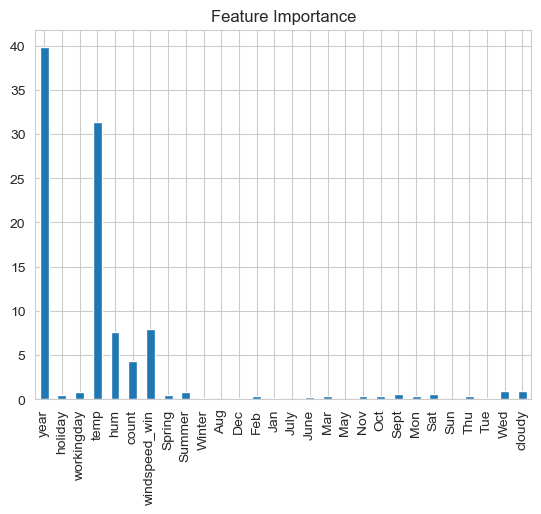

In [168]:
feature_df = pd.DataFrame(feature_dic, index=[0])
feature_df.T.plot.bar(legend=False, title = 'Feature Importance');

In [111]:
preds=pd.DataFrame({'Actual_count':y_test,'Predicted_count':y_pred1})
new_df=df.merge(preds,left_index=True,right_index=True)
new_df.sample(20,random_state=42)

,season,year,month,holiday,weekday,workingday,weathersit,temp,hum,count,windspeed_win,Actual_count,Predicted_count
213,Fall,0,Aug,0,Wed,1,clear,32.116653,49.1250,4845,13.791950,0.554878,0.506785
436,Spring,1,Mar,0,Wed,1,clear,23.165000,61.7500,5847,15.875650,0.670156,0.673713
111,Summer,0,Apr,0,Sat,1,cloudy,13.803347,72.9583,1683,14.707907,0.191095,0.272260
80,Summer,0,Mar,0,Wed,1,clear,18.108347,62.4583,2703,15.125250,0.308445,0.395313
206,Fall,0,July,0,Wed,1,clear,31.638347,54.0833,4590,13.417286,0.525541,0.530576
582,Fall,1,Aug,0,Tue,1,cloudy,30.852500,65.4167,7013,8.666718,0.804303,0.772255
122,Summer,0,May,0,Wed,1,cloudy,25.283347,69.7083,4451,22.958689,0.509549,0.425857
365,Spring,1,Jan,0,Mon,0,clear,15.170000,69.2500,2294,12.875189,0.261390,0.382238
328,Winter,0,Nov,0,Sat,1,clear,15.375000,64.3750,2792,6.626019,0.318684,0.465149
79,Summer,0,Mar,0,Tue,1,cloudy,17.647835,73.7391,2077,19.348461,0.236424,0.318953


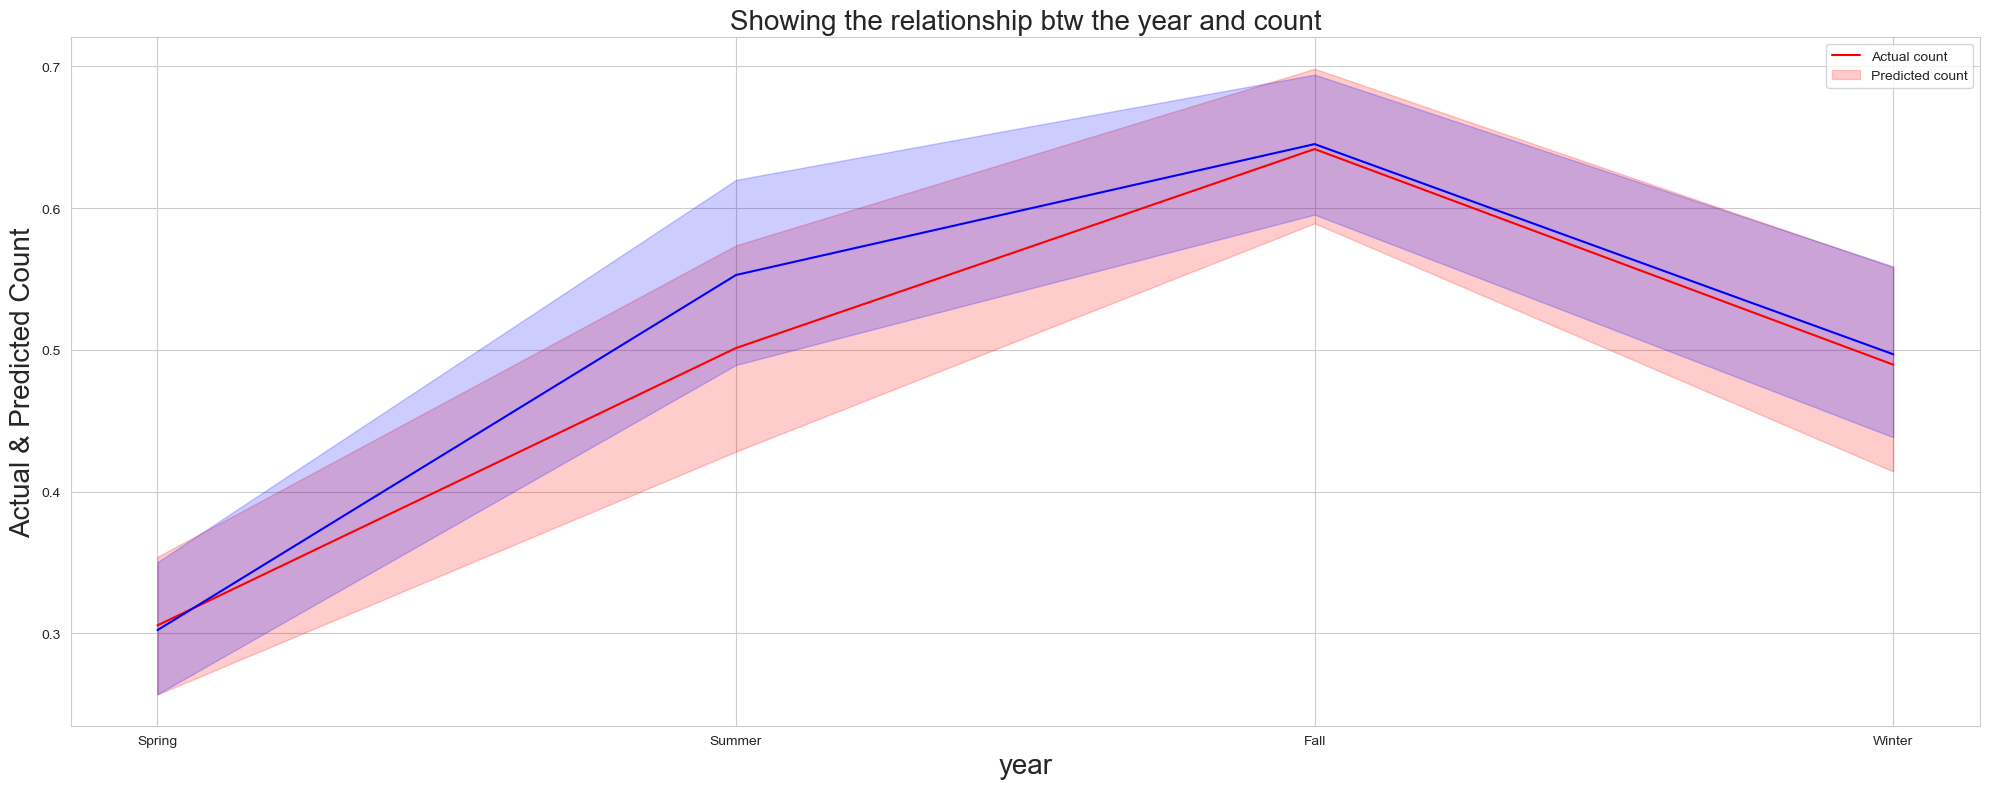

In [121]:
plt.figure(figsize=(20,8))
sns.lineplot(data=new_df,x='season', y='Actual_count', color='red')
sns.lineplot(data=new_df,x='season',y='Predicted_count',color='blue')
plt.title('Showing the relationship btw the year and count',fontsize=20)
plt.legend(labels=['Actual count','Predicted count'],fontsize=10)
plt.xlabel('year',fontsize=20)
plt.ylabel('Actual & Predicted Count',fontsize=20)
plt.tight_layout()
plt.show()

In [169]:
accuracy_score(y_test, y_pred1)

array([0.15667043, 0.36611457, 0.46514917, 0.78866991, 0.69035828,
       0.58999197, 0.17410222, 0.88572907, 0.27225972, 0.42210526,
       0.67371254, 0.17298157, 0.29849908, 0.90583067, 0.42109811,
       0.69554963, 0.3770111 , 0.38986475, 0.64118851, 0.25000925,
       0.46063731, 0.37311388, 0.34042191, 0.25474033, 0.77383774,
       0.31895271, 0.22466761, 0.62340954, 0.66074361, 0.50135675,
       0.25896876, 0.53057612, 0.0997439 , 0.72128981, 0.51348174,
       0.32451276, 0.15389888, 0.81187969, 0.60509939, 0.47222917,
       0.75318535, 0.52745921, 0.51004189, 0.66151285, 0.88044988,
       0.42940759, 0.27180003, 0.34655374, 0.44251661, 0.37593474,
       0.49386857, 0.6852828 , 0.53304169, 0.54409186, 0.14512495,
       0.44833474, 0.49091671, 0.78005237, 0.22800909, 0.54713868,
       0.81778604, 0.51012609, 0.05285988, 0.55545107, 0.20416144,
       0.43289235, 0.77225516, 0.47461708, 0.63174369, 0.81034859,
       0.45913844, 0.13640577, 0.85812074, 0.39531332, 0.49791